In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.io.data import DataReader

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [8]:
from datetime import datetime
from __future__ import division

In [9]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [10]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [15]:
stocks = {}
for stock in tech_list:
    stocks[stock] = DataReader(stock, 'yahoo', start, end)

In [17]:
stocks['AAPL'].describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,105.885020,106.778933,105.175810,106.047075,3.556875e+07,105.189008
std,8.251499,8.227360,8.335292,8.305925,1.455107e+07,8.711312
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.610001,98.480003,96.919998,97.720001,2.640410e+07,96.505269
50%,107.120003,107.879997,106.180000,107.129997,3.193190e+07,106.274363
75%,112.709999,113.389999,111.800003,112.709999,4.019160e+07,112.134277
max,122.139999,122.440002,121.599998,121.949997,1.146021e+08,121.949997


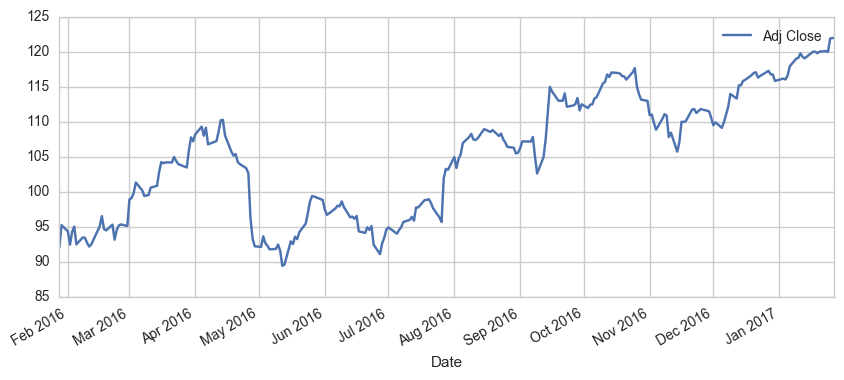

In [20]:
stocks['AAPL']['Adj Close'].plot(legend=True, figsize=(10,4))

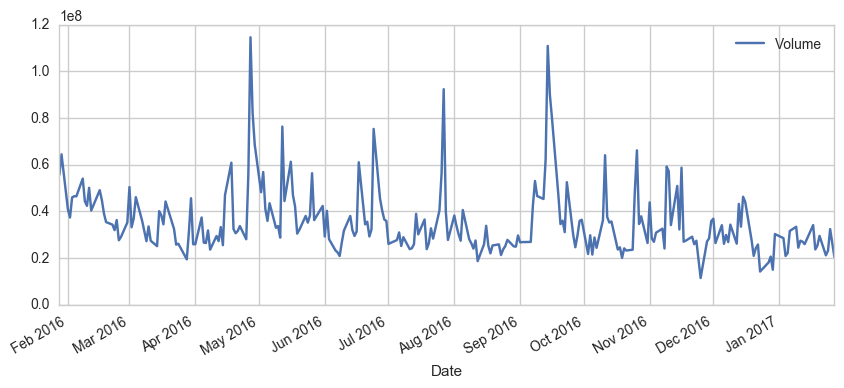

In [21]:
stocks['AAPL']['Volume'].plot(legend=True, figsize=(10,4))

In [22]:
ma_day = [10,20,50]

In [23]:
AAPL = stocks['AAPL']
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    

/Users/andymeyers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/andymeyers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/andymeyers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


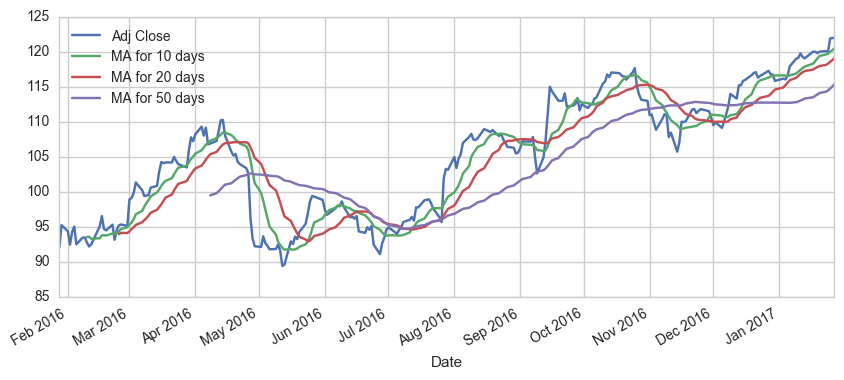

In [24]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

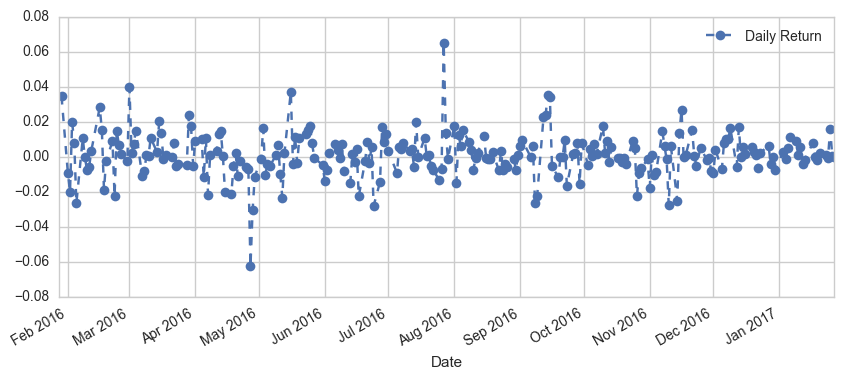

In [25]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--',marker='o')

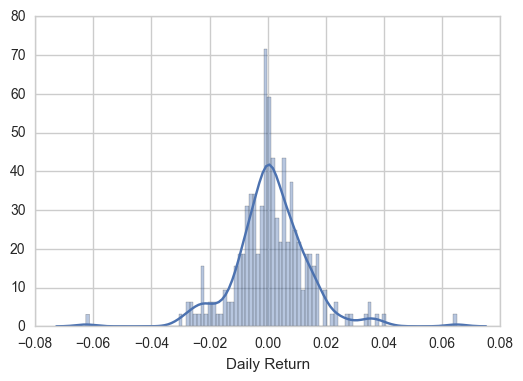

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [28]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [29]:
tech_rets = closing_df.pct_change()

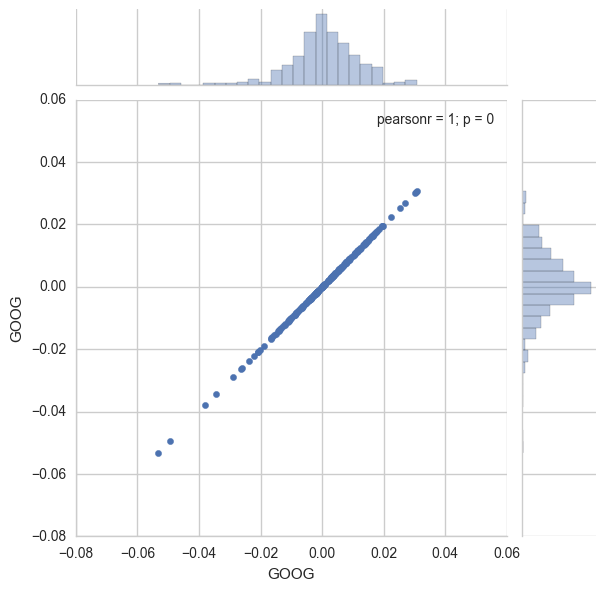

In [31]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter')

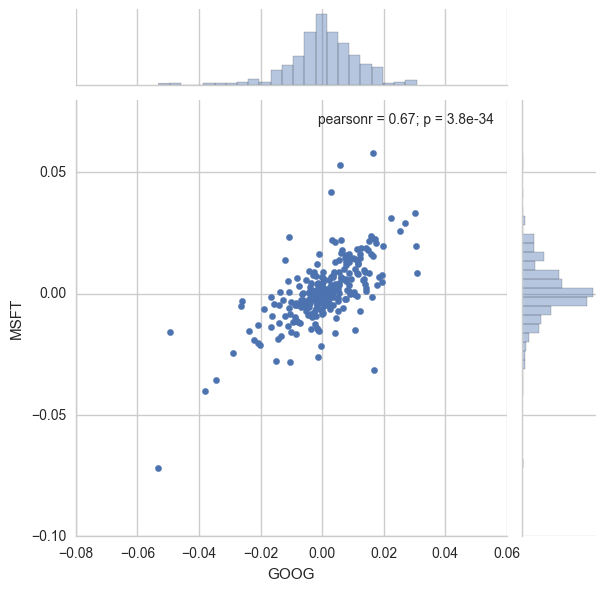

In [32]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

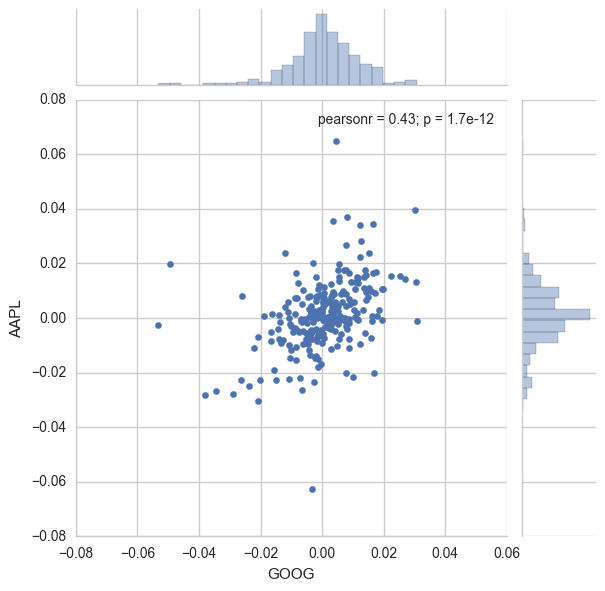

In [34]:
sns.jointplot('GOOG', 'AAPL', tech_rets, kind='scatter')

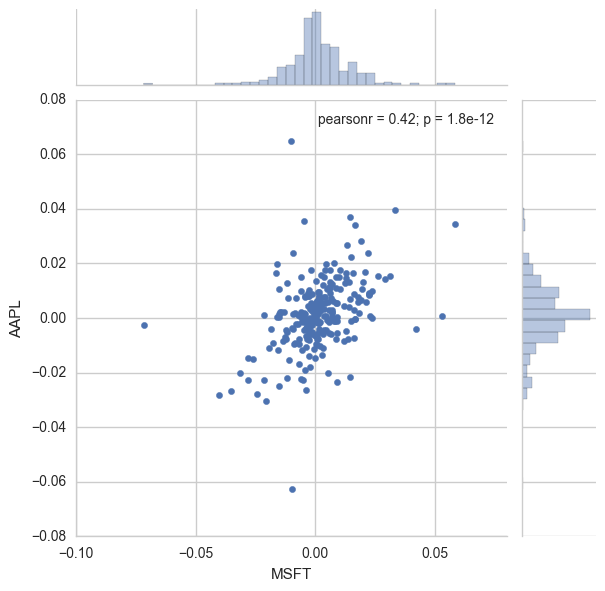

In [35]:
sns.jointplot('MSFT', 'AAPL', tech_rets, kind='scatter')

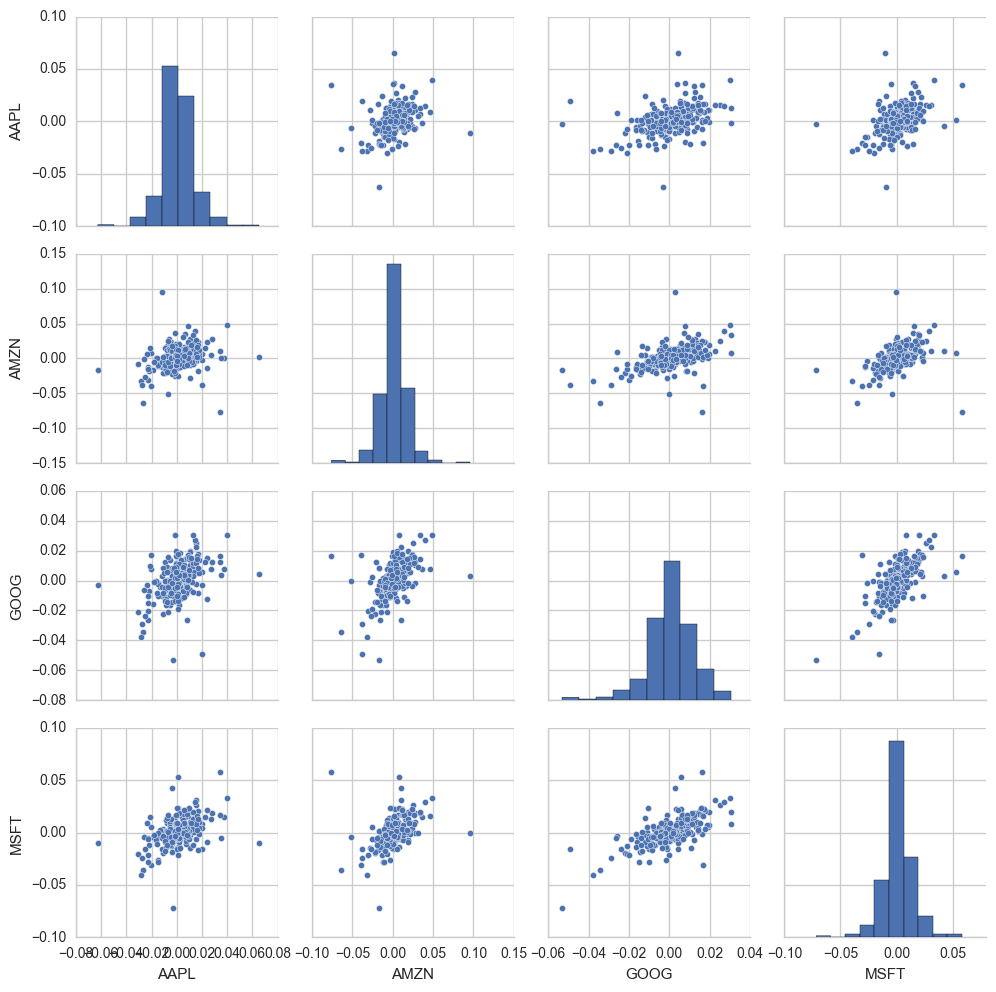

In [36]:
sns.pairplot(tech_rets.dropna())

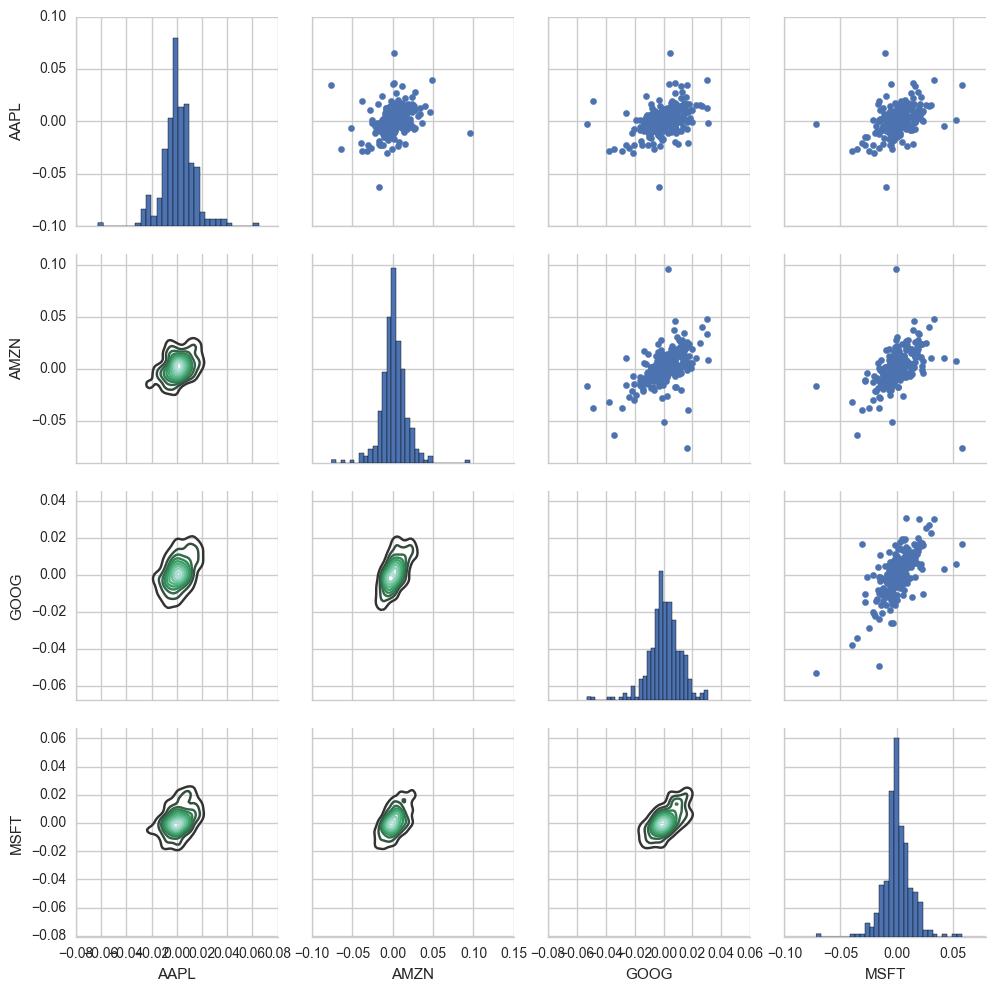

In [37]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist, bins=30)

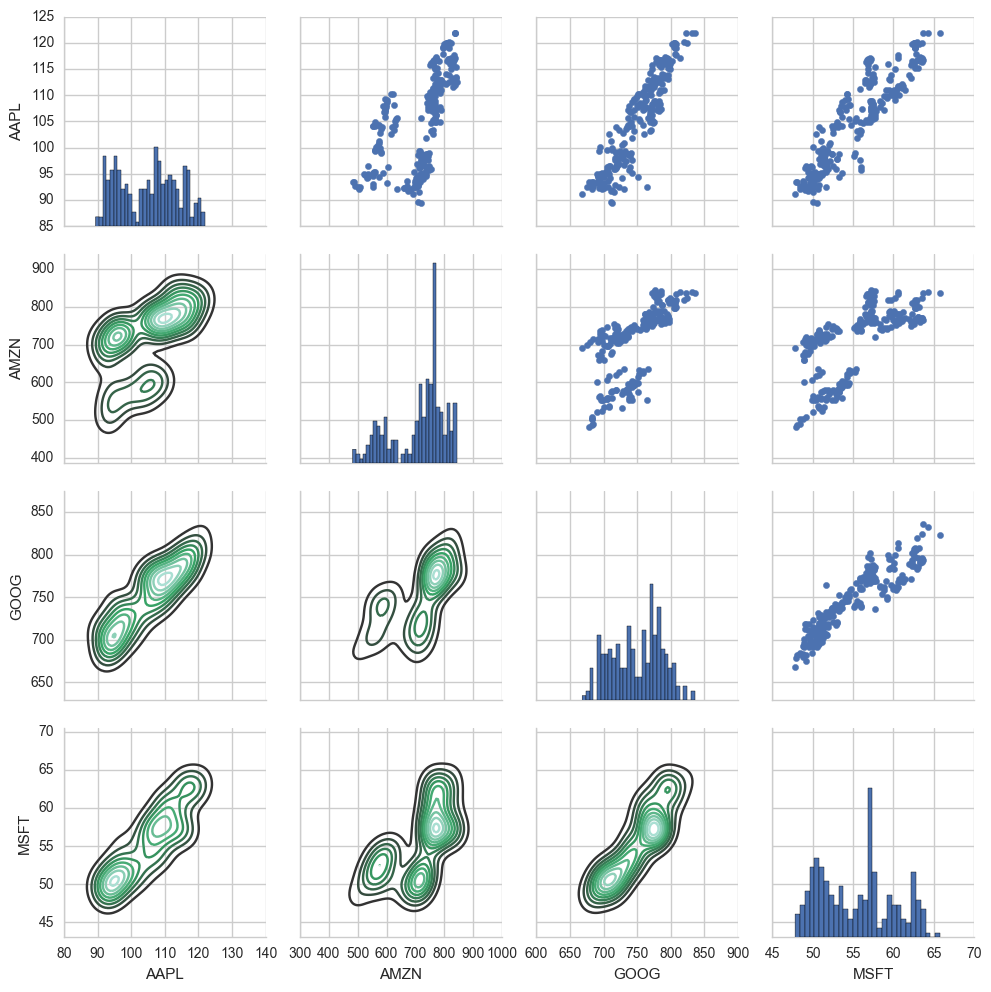

In [38]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist, bins=30)

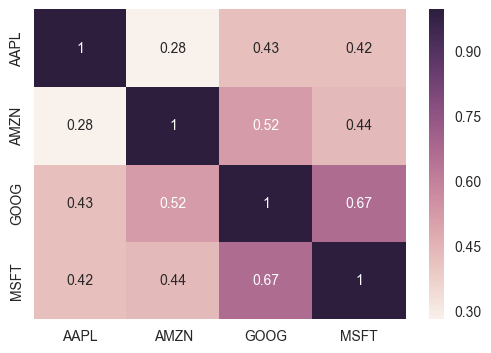

In [41]:
sns.heatmap(tech_rets.dropna().corr(), annot=True)

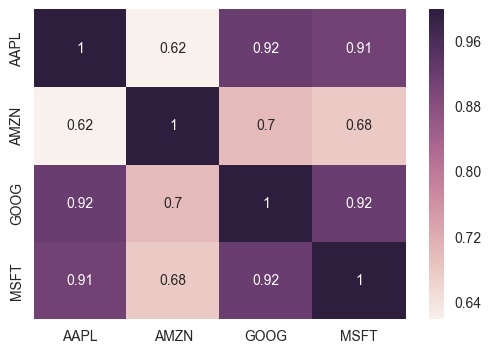

In [42]:
sns.heatmap(closing_df.dropna().corr(), annot=True)